## Series Temporales - Trabajo Práctico
### Alumna: Ariadna Garmendia

### Tema: Análisis de cantidad de pasajeros que pasaron por los molinetes del subte en la Ciudad Autónoma de Buenos Aires entre 2017 y 2019.

### ANÁLISIS DE TENDENCIA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import seaborn as sns
from scipy.stats import boxcox 
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.stattools import adfuller, acf, kpss, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from scripts.import_data import data

In [2]:
molinetes,_,_,_= data()

#### Voy a estimar la tendencia cíclica por cuadrados mínimos. Mi serie tiene dos comportamientos cíclicos superpuestos, uno anual (que es el que me interesa) y uno semanal que no me interesa y quiero remover porque al modelo voy a poderle pasar una sola componente cíclica. Por lo tanto, voy a considerar un período igual a 7 días, estimar esa tendencia cíclica por cuadrados mínimos y restarla a la serie original.

In [3]:
N = 7 # N muestras en el periodo
periods =int(molinetes.shape[0]/N) # Nro de períodos 
trend = molinetes.copy().to_numpy() # Convierto a numpy para hacer las operaciones
trend = np.reshape(trend, (periods, N)) 
trend = np.mean(trend, axis=1)
trend = pd.DataFrame(np.tile(trend,N), columns=['Mean'])
trend = pd.DataFrame(trend, columns=['Mean'])


In [4]:
de_trend = molinetes.copy().reset_index()
#de_trend.rename(columns = {'fecha':'tiempo'}, inplace=True)
de_trend['resultado'] = de_trend['total'] - trend['Mean']
de_trend.set_index('fecha', inplace=True)
de_trend.head()

,total,resultado
fecha,,
2017-01-01,86802.0,-544903.428571
2017-01-02,842897.0,-77337.000000
2017-01-03,1023625.0,417136.142857
2017-01-04,512874.0,-91645.857143
2017-01-05,204710.0,-427078.857143


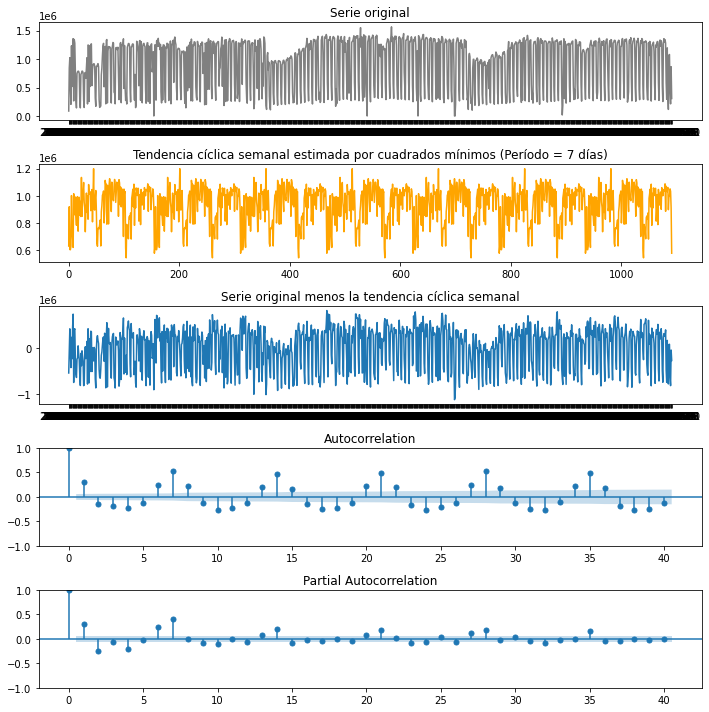

In [8]:
fig, ax = plt.subplots(5,1,figsize=(10,10))
ax[0].plot(molinetes, color='gray')
ax[0].set_title('Serie original')
ax[1].plot(trend.Mean, color='orange')
ax[1].set_title('Tendencia cíclica semanal estimada por cuadrados mínimos (Período = 7 días)')
ax[2].plot(de_trend.resultado)
ax[2].set_title('Serie original menos la tendencia cíclica semanal')
sm.graphics.tsa.plot_acf(de_trend.resultado, lags=40, ax=ax[3])
sm.graphics.tsa.plot_pacf(de_trend.resultado, method='ywm', lags=40, ax=ax[4])
plt.tight_layout()
plt.show()